In [5]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib
import os
from collections import Counter
import json
# import missingno
pd.options.display.float_format = '{:.2f}'.format

In [6]:
glob.glob(r'C:\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\*.json')

['C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\调度系统\\snt9b集群现网数据\\data\\data_1.json',
 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\调度系统\\snt9b集群现网数据\\data\\data_2.json',
 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\调度系统\\snt9b集群现网数据\\data\\data_3.json',
 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\调度系统\\snt9b集群现网数据\\data\\data_4.json',
 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\调度系统\\snt9b集群现网数据\\data\\data_5.json',
 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\调度系统\\snt9b集群现网数据\\data\\data_6.json']

In [7]:
titles = glob.glob('C:\\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\*.json')
dfs = []
for title in titles:
    if title.endswith('.json'):
        with open(title,'r') as f:
            json_data = json.load(f)
            dft = pd.DataFrame(json_data)
            dft.reset_index(inplace=True)
            dft = dft.drop('index',axis=1)
            dfs.append(dft)

In [8]:
len(dfs)

6

In [13]:
df1,df2,df3,df4,df5,df6 = dfs
dataframes = [df1,df2,df3,df4,df5,df6]
print(len(df1))
print(df1.shape)
print(df1.columns)

1054
(1054, 126)
Index(['kind', 'deleted_at', 'metadata.id', 'metadata.name',
       'metadata.create_time', 'metadata.workspace_id', 'metadata.ai_project',
       'metadata.labels.cluster.id', 'metadata.labels.cluster.project.id',
       'metadata.labels.training-job',
       ...
       'algorithm.environments.PIPE_NUMBER_PER_RANK',
       'algorithm.environments.DATA_OFFSET', 'algorithm.environments.CONTEXT',
       'algorithm.environments.MODEL_TYPE', 'algorithm.environments.PLATFORM',
       'algorithm.environments.PREFIX',
       'algorithm.environments.MA_SAVE_EXPORT',
       'algorithm.environments.HCCL_DETERMINISTIC',
       'algorithm.environments.ROUTEPLAN_ALGO_VERSION',
       'algorithm.environments.ROUTEPLAN_PP'],
      dtype='object', length=126)


只保留存在时间的任务

In [14]:
for df in dataframes:
    mask = df['status.start_time'].isna() | df['metadata.create_time'].isna() | (df['status.start_time']== None) | (df['metadata.create_time']== None) | (df['status.start_time']==0) | (df['metadata.create_time']==0) 
    df['scheduling_time'] = np.where(mask,np.nan, df['status.start_time']-df['metadata.create_time'])

In [15]:
for df in dataframes:
    df = df.dropna(subset=['scheduling_time'])

In [17]:
pd.to_datetime('1708606592849', unit='ms')
print(pd.to_datetime('1708606592849', unit='ms'))

2024-02-22 12:56:59.648000


C:\Windows\Temp\ipykernel_17564\3878716624.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  pd.to_datetime('1708606592849', unit='ms')
C:\Windows\Temp\ipykernel_17564\3878716624.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  print(pd.to_datetime('1708606592849', unit='ms'))


统计运行状态，共有6种运行状态
Terminated：正常终止(是被用户还是被系统)
Completed：完成
Failed：失败，中途遇到错误或者异常
Abnormal：这个也是失败，但是不知道是什么状态
Running：正在运行


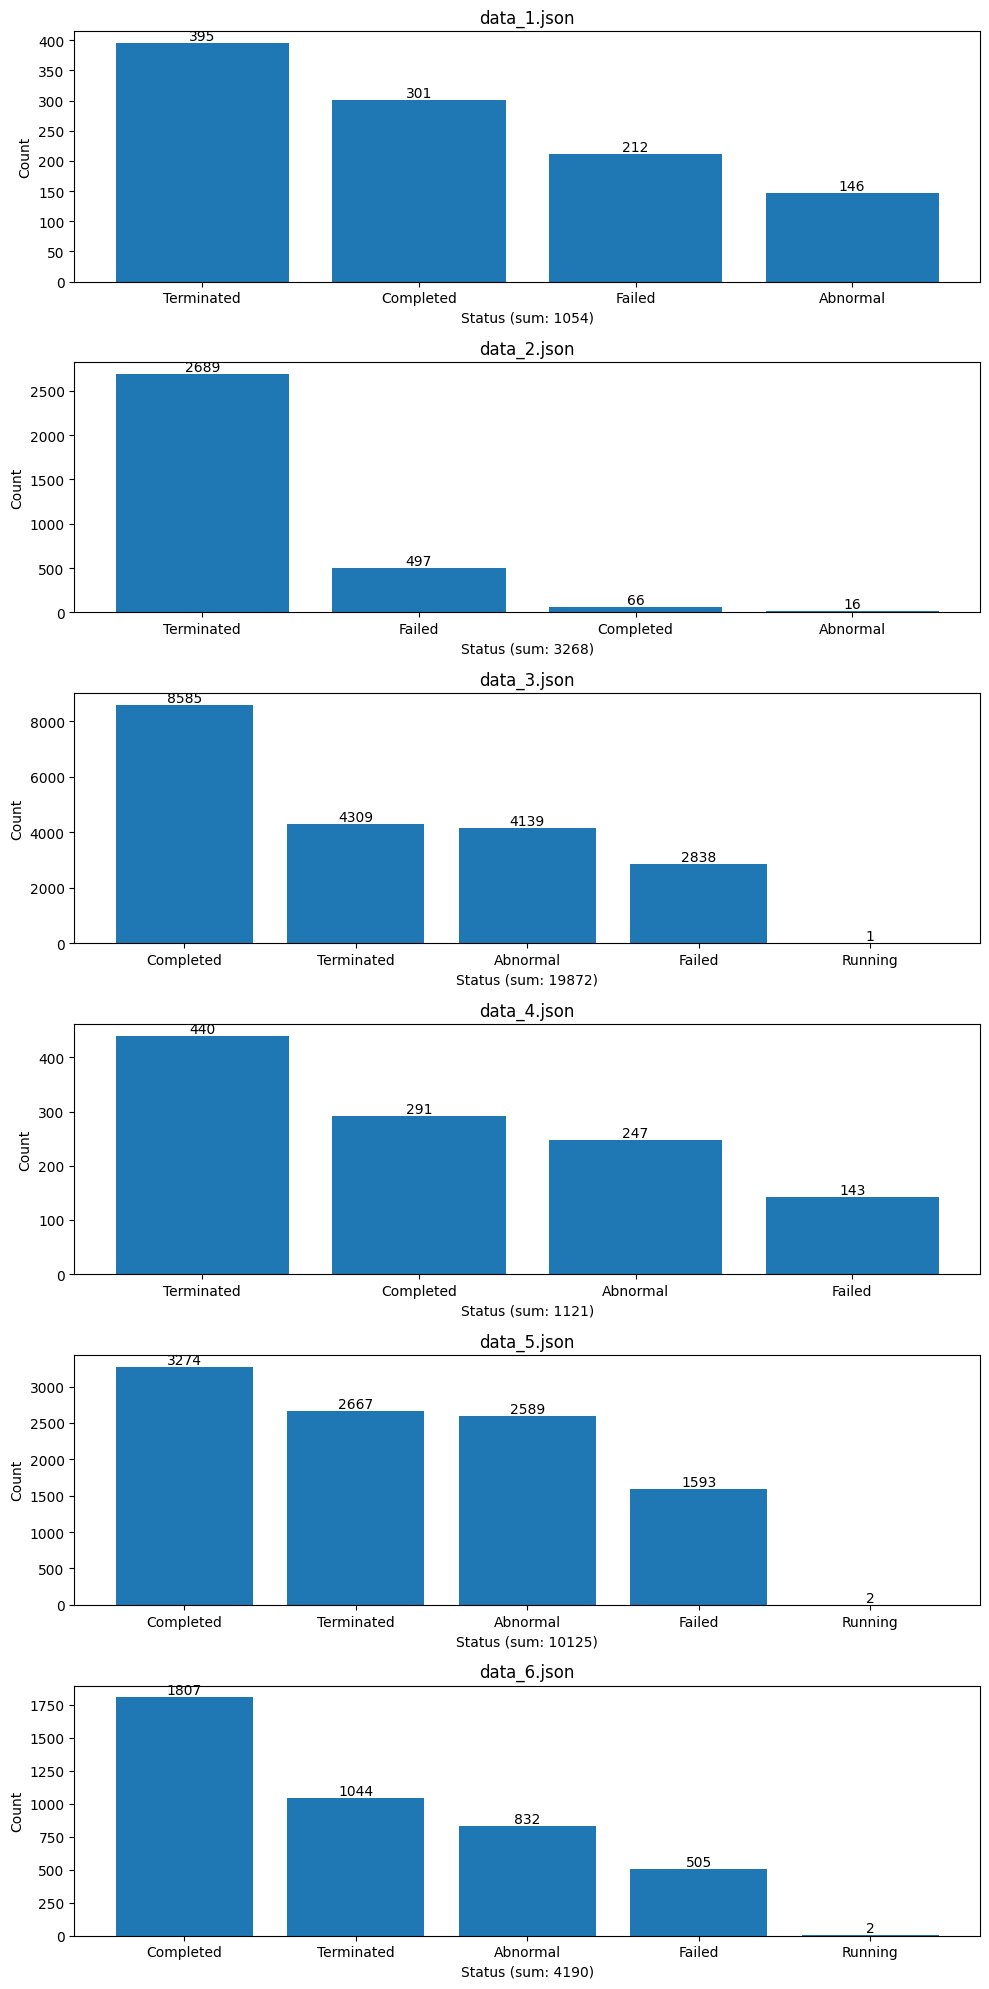

In [26]:
    
titles = [os.path.basename(title) for title in titles]
fig, axs = plt.subplots(len(dataframes),figsize=(10,20))

for i,dft in enumerate(dataframes):
    status_counts = dft['status.phase'].value_counts()
    bars = axs[i].bar(status_counts.index,status_counts.values)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(f'Status (sum: {sum(status_counts.values)})')
    axs[i].set_ylabel('Count')

    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x()+ bar.get_width()/2, yval +0.05, yval, ha= 'center', va='bottom')
plt.tight_layout()
plt.show()

In [21]:
df1.shape[0]

1054

In [30]:
for i,dft in enumerate(dataframes):
    
    print("pool: "+titles[i]+", number of jobs: "+str(dft.shape[0])+", numbers of columns: "+str(len(dft.columns)))

pool: data_1.json, number of jobs: 1054, numbers of columns: 127
pool: data_2.json, number of jobs: 3268, numbers of columns: 105
pool: data_3.json, number of jobs: 19872, numbers of columns: 379
pool: data_4.json, number of jobs: 1121, numbers of columns: 145
pool: data_5.json, number of jobs: 10125, numbers of columns: 231
pool: data_6.json, number of jobs: 4190, numbers of columns: 255


In [44]:
path='C:\\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\csv'
for i in range(len(dataframes)):
    filePath=os.path.join(path,titles[i][0:-5]+'.csv')
    dataframes[i].to_csv(filePath,index=True)
    print(filePath)

C:\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\csv\data_1.csv
C:\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\csv\data_2.csv
C:\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\csv\data_3.csv
C:\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\csv\data_4.csv
C:\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\csv\data_5.csv
C:\Users\Administrator\Desktop\IdsLab\任务\调度系统\snt9b集群现网数据\data\csv\data_6.csv


In [48]:
df_concat=pd.concat(dataframes,ignore_index=True)

很奇怪这里为什么才8*24

In [49]:
df_concat.describe()

,metadata.create_time,status.duration,status.retry_count,status.start_time,status.metrics_statistics.cpu_usage.average,status.metrics_statistics.cpu_usage.max,status.metrics_statistics.cpu_usage.min,status.metrics_statistics.mem_usage.average,status.metrics_statistics.mem_usage.max,status.metrics_statistics.mem_usage.min,...,status.metrics_statistics.npu.util.max,status.metrics_statistics.npu.util.min,spec.resource.node_count,spec.resource.pool_info.core_num,spec.resource.pool_info.mem_size,spec.resource.pool_info.cache_size,spec.resource.pool_info.accelerator_num,spec.schedule_policy.priority,scheduling_time,spec.auto_stop.duration
count,39630.00,39630.00,39630.00,39630.00,39630.00,39630.00,39630.00,39630.00,39630.00,39630.00,...,39630.00,39630.00,39630.00,39630.00,39630.00,39630.00,39630.00,39620.00,36988.00,32.00
mean,1708283468078.98,50174700.53,0.05,1594413271416.12,4.49,18.36,0.00,10.80,19.69,-0.08,...,27.88,-0.09,13.84,176.19,1473.64,181.50,7.75,2.38,965948.04,2.00
std,2530481897.81,252619719.77,9.15,426137266450.70,7.14,17.02,0.52,14.70,22.31,0.66,...,45.66,0.65,40.19,29.30,244.01,605.43,1.28,0.70,12496640.15,0.00
min,1704075622068.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,1.00,22.00,190.00,0.00,1.00,1.00,4337.00,2.00
25%,1705996969860.00,894000.00,0.00,1705630568500.00,0.78,4.79,0.00,0.14,0.79,0.00,...,0.00,0.00,1.00,182.00,1522.00,0.00,8.00,2.00,75805.00,2.00
50%,1708392518596.50,2789000.00,0.00,1707911416000.00,3.09,16.37,0.03,6.05,14.24,0.00,...,0.00,0.00,2.00,182.00,1522.00,0.00,8.00,3.00,112708.50,2.00
75%,1710520431928.00,9221750.00,0.00,1710422300750.00,5.59,25.73,0.10,15.22,28.56,0.01,...,49.00,0.00,16.00,182.00,1522.00,0.00,8.00,3.00,277724.25,2.00
max,1712785501768.00,10628453000.00,1820.00,1712840387000.00,91.88,100.00,25.80,97.85,100.00,67.66,...,239.00,90.00,606.00,182.00,1522.00,2201.00,8.00,3.00,1289472431.00,2.00


In [54]:
intervals = [8,16,24,32,64,128,256,512,float('inf')]
labels = ['[0,8] cards','[9,16] cards','[17,32] cards','[33,64] cards', '[65,128] cards', '[129,256] cards', '[257,512] cards', '>512 cards']
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
df_sorted["group"] = pd.cut(df_sorted["spec.resource.node_count"],bins=intervals,labels=labels)
# job_counts = df_sorted["status.duration"].value_counts().sort_index()
grouped_df = df_sorted.groupby(['group']).size()

# grouped_df['status.phase'] = grouped_df['status.phase'].astype('category')
# grouped_df['status.phase'].cat.reorder_categories(category_order,inplace=True)
# x= job_counts.index.astype(str)
# y= grouped_df.sum(axis=1)

grouped_df.plot(kind='pie')
plt.title('jobs NPU card usage')
# plt.xlabel('Running Duration')
# plt.ylabel('Job numbers')
# plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
# for i,v in enumerate(y):
#     plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

AttributeError: 'DataFrame' object has no attribute '_convert'

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = pd.concat(dataframes,ignore_index=True)

job['spec.resource.node_count'] = job['spec.resource.node_count']*8
job_scale = pd.DataFrame({'jobs':['1','2','3','4-6','7-15','16-31','32-63','>=64'],'numbers':[0,0,0,0,0,0,0,0]}, columns=['jobs','numbers'])
for num in job['spec.resource.node_count']:
    if num <4:
        job_scale['numbers'][num-1] += 1
    elif num < 7:
        job_scale['numbers'][3] += 1
    elif num < 16:
        job_scale['numbers'][4] += 1
    elif num < 32:
        job_scale['numbers'][5] += 1
    elif num < 64:
        job_scale['numbers'][6] += 1
    else:
        job_scale['numbers'][7] += 1

job_scale_weight = pd.DataFrame({'jobs':['8','16','32','<','7-15','16-31','32-63','>=64'],'numbers':[0,0,0,0,0,0,0,0]}, columns=['jobs','numbers'])
for num in job['spec.resource.node_count']:
    if num <4:
        job_scale_weight['numbers'][num-1] += num
    elif num < 7:
        job_scale_weight['numbers'][3] += num
    elif num < 16:
        job_scale_weight['numbers'][4] += num
    elif num < 32:
        job_scale_weight['numbers'][5] += num
    elif num < 64:
        job_scale_weight['numbers'][6] += num
    else:
        job_scale_weight['numbers'][7] += num

sizes = job_scale['numbers']
labels = job_scale['jobs']
plt.figure(figsize=(8,8),dpi=120)
plt.pie(sizes,         # 每个扇区大小
        labels=labels, # 每个扇区标签
        autopct='%.2f%%', # 计算百分比格式 %格式%   %d%% 整数百分比  %.2f%% 小数点后保留2位的浮点数百分比
        )

plt.title("NPU card used in jobs ")

In [ ]:
df1 = df1.dropna(subset=['scheduling_time'])
df2 = df1.dropna(subset=['scheduling_time'])
df3 = df1.dropna(subset=['scheduling_time'])
df4 = df1.dropna(subset=['scheduling_time'])
df5 = df1.dropna(subset=['scheduling_time'])
df6 = df1.dropna(subset=['scheduling_time'])


In [ ]:
titles = [os.path.basename(title) for title in titles]
fig, axs = plt.subplots(len(dataframes),figsize=(10,20))
intervals = [0,120,300,600,1800,3600,7200,14400,float('inf')]
labels = ['<2 min','<5 min','<10 min','<30 min','<60 min','<2 hours', '<4 hours','>4 hours']
for i,dft in enumerate(dataframes):
    dfb = dft.dropna(subset=['scheduling_time'])
    df_sorted = dfb.sort_values("scheduling_time")
    df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
    df_sorted["scheduling_time"] = pd.cut(df_sorted["scheduling_time"],bins=intervals,labels=labels)
    job_counts = df_sorted["scheduling_time"].value_counts().sort_index()
    x= job_counts.index.astype(str)
    y= job_counts.values
    
    
    bars = axs[i].bar(x,y)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Scheduling Time')
    axs[i].set_ylabel('jobs numbers')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,ha="right",rotation_mode = "anchor")
    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x()+ bar.get_width()/2, yval +0.05, yval, ha= 'center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,120,300,600,1800,3600,7200,14400,float('inf')]
labels = ['<2 min','<5 min','<10 min','<30 min','<60 min','<2 hours', '<4 hours','>4 hours']
dfb = df_concat.dropna(subset=['scheduling_time'])
df_sorted = dfb.sort_values("scheduling_time")
df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
df_sorted["scheduling_time"] = pd.cut(df_sorted["scheduling_time"],bins=intervals,labels=labels)
job_counts = df_sorted["scheduling_time"].value_counts().sort_index()
x= job_counts.index.astype(str)
y= job_counts.values


plt.bar(x,y)
plt.title('Job Scheduling all pool')
plt.xlabel('Scheduling Time')
plt.ylabel('job numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
df['status.duration']

In [ ]:
df_concat.groupby('scheduling_time')['spec.resource.pool_info.accelerator_num'].sum()

In [ ]:
###cards###
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
job_counts = df_sorted["status.duration"].value_counts().sort_index()
x= job_counts.index.astype(str)
y= job_counts.values


plt.bar(x,y)
plt.title('Job Scheduling all pool')
plt.xlabel('Running Duration')
plt.ylabel('Job numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
df_concat['status.duration'].sort_values()

In [ ]:
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
npu_counts = df_sorted.groupby('status.duration')['spec.resource.node_count'].sum()
x= npu_counts.index.astype(str)
y= npu_counts.values


plt.bar(x,y)
plt.title('NPU usage all pool')
plt.xlabel('Running Duration')
plt.ylabel('NPU numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

In [ ]:
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration.group"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
# npu_counts = df_sorted.groupby('status.duration')['spec.resource.node_count'].sum()
grouped_df = df_sorted.groupby(['status.duration.group','status.phase']).size().unstack()
x= npu_counts.index.astype(str)
y= npu_counts.values


grouped_df.plot(kind='bar',stacked=True)
plt.title('NPU usage all pool')
plt.xlabel('Running Duration')
plt.ylabel('NPU numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
# for i,v in enumerate(y):
#     plt.text(i,v,str(v),ha='center',va='bottom')

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration.group"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
# job_counts = df_sorted["status.duration"].value_counts().sort_index()

grouped_df = df_sorted.groupby(['status.duration.group','status.phase']).size().unstack()
# grouped_df['status.phase'] = grouped_df['status.phase'].astype('category')
# grouped_df['status.phase'].cat.reorder_categories(category_order,inplace=True)
# x= job_counts.index.astype(str)
# y= job_counts.values

grouped_df = grouped_df[['Completed','Terminated','Abnormal','Failed']]
grouped_df.plot(kind='bar',stacked=True, color=colors)
plt.title('Job Scheduling all pool')
plt.xlabel('Running Duration')
plt.ylabel('Job numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
# for i,v in enumerate(y):
#     plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,120,300,600,1800,3600,7200,14400,float('inf')]
labels = ['<2 min','<5 min','<10 min','<30 min','<60 min','<2 hours', '<4 hours','>4 hours']
dfb = df_concat.dropna(subset=['scheduling_time'])
df_sorted = dfb.sort_values("scheduling_time")
df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
df_sorted["scheduling_time.group"] = pd.cut(df_sorted["scheduling_time"],bins=intervals,labels=labels)
job_counts = df_sorted["scheduling_time.group"].value_counts().sort_index()

grouped_df = df_sorted.groupby(['scheduling_time.group','status.phase']).size().unstack()
# grouped_df['status.phase'] = grouped_df['status.phase'].astype('category')
# grouped_df['status.phase'].cat.reorder_categories(category_order,inplace=True)
x= job_counts.index.astype(str)
y= job_counts.values

grouped_df = grouped_df[['Completed','Terminated','Abnormal','Failed']]
grouped_df.plot(kind='bar',stacked=True, color=colors)
plt.title('Job Scheduling all pool')
plt.xlabel('Waiting time')
plt.ylabel('Job numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,120,300,600,1800,3600,7200,14400,float('inf')]
labels = ['<2 min','<5 min','<10 min','<30 min','<60 min','<2 hours', '<4 hours','>4 hours']
dfb = df_concat.dropna(subset=['scheduling_time'])
df_sorted = dfb.sort_values("scheduling_time")
df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
df_sorted["scheduling_time"] = pd.cut(df_sorted["scheduling_time"],bins=intervals,labels=labels)
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
npu_counts = df_sorted.groupby(['scheduling_time','status.phase'])['spec.resource.node_count'].sum().unstack()
y=npu_counts.sum(axis=1)
npu_counts = npu_counts[['Completed','Terminated','Abnormal','Failed']]
npu_counts.plot(kind='bar',stacked=True, color=colors)
plt.title('NPU usage all pool')
plt.xlabel('Waiting time')
plt.ylabel('NPU numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration.group"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
# job_counts = df_sorted["status.duration"].value_counts().sort_index()

grouped_df = df_sorted.groupby(['status.duration.group','status.phase']).size().unstack()
# grouped_df['status.phase'] = grouped_df['status.phase'].astype('category')
# grouped_df['status.phase'].cat.reorder_categories(category_order,inplace=True)
# x= job_counts.index.astype(str)
y= grouped_df.sum(axis=1)

grouped_df = grouped_df[['Completed','Terminated','Abnormal','Failed']]
grouped_df.plot(kind='bar',stacked=True, color=colors)
plt.title('Job Scheduling  cards and more')
plt.xlabel('Running Duration')
plt.ylabel('Job numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
npu_counts = df_sorted.groupby(['status.duration','status.phase'])['spec.resource.node_count'].sum().unstack()
y=npu_counts.sum(axis=1)
npu_counts = npu_counts[['Completed','Terminated','Abnormal','Failed']]
npu_counts.plot(kind='bar',stacked=True, color=colors)
plt.title('NPU usage all pool')
plt.xlabel('Running Duration')
plt.ylabel('NPU numbers')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper right")
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,120,300,600,1800,3600,7200,14400,float('inf')]
labels = ['<2 min','<5 min','<10 min','<30 min','<60 min','<2 hours', '<4 hours','>4 hours']
dfb = df_concat.dropna(subset=['scheduling_time'])
dfb = dfb[dfb['spec.resource.node_count']*8 >= 1000]
df_sorted = dfb.sort_values("scheduling_time")
df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
df_sorted["scheduling_time.group"] = pd.cut(df_sorted["scheduling_time"],bins=intervals,labels=labels)
job_counts = df_sorted["scheduling_time.group"].value_counts().sort_index()

grouped_df = df_sorted.groupby(['scheduling_time.group','status.phase']).size().unstack()
# grouped_df['status.phase'] = grouped_df['status.phase'].astype('category')
# grouped_df['status.phase'].cat.reorder_categories(category_order,inplace=True)
x= job_counts.index.astype(str)
y= job_counts.values

grouped_df = grouped_df[['Completed','Terminated','Abnormal','Failed']]
grouped_df.plot(kind='bar',stacked=True, color=colors)
plt.title('waiting time distribution of jobs')
plt.xlabel('Waiting time')
plt.ylabel('Job numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,120,300,600,1800,3600,7200,14400,float('inf')]
labels = ['<2 min','<5 min','<10 min','<30 min','<60 min','<2 hours', '<4 hours','>4 hours']
dfb = df_concat.dropna(subset=['scheduling_time'])
dfb = dfb[dfb['spec.resource.node_count']*8 >= 1000]
df_sorted = dfb.sort_values("scheduling_time")
df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
df_sorted["scheduling_time"] = pd.cut(df_sorted["scheduling_time"],bins=intervals,labels=labels)
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
npu_counts = df_sorted.groupby(['scheduling_time','status.phase'])['spec.resource.node_count'].sum().unstack()
y=npu_counts.sum(axis=1)
npu_counts = npu_counts[['Completed','Terminated','Abnormal','Failed']]
npu_counts.plot(kind='bar',stacked=True, color=colors)
plt.title('waiting time distribution of jobs')
plt.xlabel('Waiting time')
plt.ylabel('NPU numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
dfb = dfb[dfb['spec.resource.node_count']*8 >= 1000]
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration.group"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
# job_counts = df_sorted["status.duration"].value_counts().sort_index()

grouped_df = df_sorted.groupby(['status.duration.group','status.phase']).size().unstack()
# grouped_df['status.phase'] = grouped_df['status.phase'].astype('category')
# grouped_df['status.phase'].cat.reorder_categories(category_order,inplace=True)
# x= job_counts.index.astype(str)
y= grouped_df.sum(axis=1)

grouped_df = grouped_df[['Completed','Terminated','Abnormal','Failed']]
grouped_df.plot(kind='bar',stacked=True, color=colors)
plt.title('running duration distribution of jobs')
plt.xlabel('Running Duration')
plt.ylabel('Job numbers')
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
colors= ['green','orange','yellow','red']
category_order = ['Completed','Terminated','Abnormal','Failed']
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
dfb = dfb[dfb['spec.resource.node_count']*8 >= 1000]
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
npu_counts = df_sorted.groupby(['status.duration','status.phase'])['spec.resource.node_count'].sum().unstack()
y=npu_counts.sum(axis=1)
npu_counts = npu_counts[['Completed','Terminated','Abnormal','Failed']]
npu_counts.plot(kind='bar',stacked=True, color=colors)
plt.title('running duration distribution of jobs')
plt.xlabel('Running Duration')
plt.ylabel('NPU numbers')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper right")
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',va='bottom')

In [ ]:
grouped_df = df_sorted.groupby(['status.duration.group']).size()
grouped_df

In [ ]:
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
dfb = dfb[dfb['spec.resource.node_count']*8 >= 1000]
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration.group"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
# job_counts = df_sorted["status.duration"].value_counts().sort_index()
grouped_df = df_sorted.groupby(['status.duration.group']).size()

# grouped_df['status.phase'] = grouped_df['status.phase'].astype('category')
# grouped_df['status.phase'].cat.reorder_categories(category_order,inplace=True)
# x= job_counts.index.astype(str)
# y= grouped_df.sum(axis=1)

grouped_df.plot(kind='pie')
plt.title('running duration distribution of jobs')
# plt.xlabel('Running Duration')
# plt.ylabel('Job numbers')
# plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
# for i,v in enumerate(y):
#     plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [ ]:
intervals = [0,600,1800,3600,7200,14400,21600,28800,43200,86400,172800,345600,518400,float('inf')]
labels = ['<10 min','<30 min','<60 min','<2 hours', '<4 hours', '<6 hours', '<8 hours', '<12 hours', '<1 day', '<2 days', '<4 days', '<6 days', '>6 days']
dfb = df_concat.dropna(subset=['status.duration'])
dfb = dfb[dfb['spec.resource.node_count']*8 >= 1000]
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
df_sorted["status.duration"] = pd.cut(df_sorted["status.duration"],bins=intervals,labels=labels)
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
npu_counts = df_sorted.groupby(['status.duration'])['spec.resource.node_count'].sum()
# y=npu_counts.sum(axis=1)
# npu_counts = npu_counts[['Completed','Terminated','Abnormal','Failed']]
npu_counts.plot(kind='pie')
plt.title('running duration distribution of jobs')
# plt.xlabel('Running Duration')
# plt.ylabel('NPU numbers')
# plt.legend(bbox_to_anchor=(1.04,1),loc="upper right")
# plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")
# for i,v in enumerate(y):
#     plt.text(i,v,str(v),ha='center',va='bottom')()
plt.show()

In [ ]:
df_sorted

In [ ]:
df_concat= pd.concat(dataframes,ignore_index=True)
dfb = df_concat.dropna(subset=['scheduling_time'])
df_sorted = dfb.sort_values("scheduling_time")
df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
y=npu_counts.sum(axis=1)
groups= df_sorted.groupby('spec.resource.pool_id')
for name, group in groups:
    plt.scatter(group["spec.resource.node_count"],group["scheduling_time"],label='-'.join(name.split('-')[:-1]))
# plt.scatter(df_sorted["status.duration"],df_sorted["spec.resource.node_count"],c=df_sorted['spec.resource.pool_id'],cmap='cmo.deep')
# npu_counts.plot(kind='bar',stacked=True, color=colors)
plt.title('Scheduling time vs Number of NPU Used')
plt.xlabel('NPU numbers')
plt.ylabel('Scheduling time (in seconds)')
plt.ticklabel_format(style='plain')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper right")
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")

In [ ]:
df_sorted['spec.resource.pool_id'].unique()

In [ ]:
df_concat= pd.concat(dataframes,ignore_index=True)
dfb = df_concat.dropna(subset=['status.duration'])
df_sorted = dfb.sort_values("status.duration")
df_sorted["status.duration"] = df_sorted["status.duration"] /1000
# df_sorted = df_sorted[df_sorted['status.duration']<= 200000]
df_sorted = df_sorted[df_sorted['status.phase']== 'Completed']

df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
# df_sorted= df_sorted[df_sorted['spec.resource.node_count']>64]
df_sorted= df_sorted[df_sorted['spec.resource.pool_id']=='os-d910b-c002-test-bcaad347572340b3821c54fd24df5798']
groups= df_sorted.groupby('spec.resource.pool_id')
for name, group in groups:
    plt.scatter(group["spec.resource.node_count"],group["status.duration"],label='-'.join(name.split('-')[:-1]))
# plt.scatter(df_sorted["status.duration"],df_sorted["spec.resource.node_count"],c=df_sorted['spec.resource.pool_id'],cmap='cmo.deep')
# npu_counts.plot(kind='bar',stacked=True, color=colors)
plt.title('Runnning duration vs Number of NPU Used')
plt.xlabel('NPU numbers')
plt.ylabel('Running Duration (in seconds)')
plt.ticklabel_format(style='plain')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper right")
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")

In [ ]:
df_sorted['status.duration']

In [ ]:
df_concat.to_excel("Table20240101_20240411.xlsx")

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
# import pandas_bokeh
# pandas_bokeh.output_notebook()
output_notebook()
from bokeh.models.widgets import DataTable,TableColumn
from bokeh.palettes import Spectral10
# data_table = DataTable(
#     columns=[TableColumn(field=Ci,title=Ci) for Ci in df_sorted.columns],
#     source= ColumnDataSource(df_sorted),
#     width=300,
#     height=300
# )

# p_scatter = df_sorted.plot_bokeh(
    
#     title = 'Runnning duration vs Number of NPU Used',
#     x='spec.resource.node_count',
#     y='status.duration',
#     category='spec.resource.pool_id',
       
# )
# pandas_bokeh.plot_grid([[data_table,p_scatter]],width=500,height=500)
source = ColumnDataSource(df_sorted)
pool = df_sorted['spec.resource.pool_id'].unique()
color_map = factor_cmap('spec.resource.pool_id', palette = Spectral10, factors= pool)
p = figure(title = 'Runnning duration vs Number of NPU Used',x_axis_label='Number of NPUs Used', y_axis_label='Job Running Duration')
p.scatter('spec.resource.node_count',"status.duration",source=source,fill_alpha=0.6,color=color_map, legend_field='spec.resource.pool_id', size=10)
p.legend.location= "top_right"
show(p)

In [ ]:
df_concat= pd.concat(dataframes,ignore_index=True)
dfb = df_concat.dropna(subset=['scheduling_time'])
df_sorted = dfb.sort_values("scheduling_time")
df_sorted["scheduling_time"] = df_sorted["scheduling_time"] /1000
df_sorted['spec.resource.node_count'] = df_sorted['spec.resource.node_count']*8
y=npu_counts.sum(axis=1)
groups= df_sorted.groupby('spec.resource.pool_id')
for name, group in groups:
    plt.scatter(group["spec.resource.node_count"],group["scheduling_time"],label='-'.join(name.split('-')[:-1]))
# plt.scatter(df_sorted["status.duration"],df_sorted["spec.resource.node_count"],c=df_sorted['spec.resource.pool_id'],cmap='cmo.deep')
# npu_counts.plot(kind='bar',stacked=True, color=colors)
plt.title('Scheduling time vs Number of NPU Used')
plt.xlabel('NPU numbers')
plt.ylabel('Scheduling time (in seconds)')
plt.ticklabel_format(style='plain')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper right")
plt.xticks(rotation=45,ha="right",rotation_mode = "anchor")

In [ ]:
df_sorted['status.duration']

In [ ]:
groups.status.duration

In [ ]:
df['scheduling_time'] = df['status.start_time']-df['metadata.create_time']
df2['scheduling_time'] = df2['status.start_time']-df2['metadata.create_time']
df3['scheduling_time'] = df3['status.start_time']-df3['metadata.create_time']
df4['scheduling_time'] = df4['status.start_time']-df4['metadata.create_time']
df5['scheduling_time'] = df5['status.start_time']-df5['metadata.create_time']
df6['scheduling_time'] = df6['status.start_time']-df6['metadata.create_time']

In [ ]:
df['scheduling_time']

In [ ]:
dataframes = [df,df2,df3,df4,df5,df6]
df_concat= pd.concat(dataframes,ignore_index=True)
df_concat.describe(include="all")

In [ ]:
df_concat

In [ ]:
df_expanded = df_concat.explode('status.tasks')
node_c = df_expanded['status.tasks'].value_counts()
plt.figure(figsize=(100,20))
node_c.plot(kind='bar')

plt.xlabel('Node')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs for Earch Node')

plt.xticks(rotation=45)
plt.show()

In [ ]:
df_concat.to_csv('dfpool4clusters.csv')

In [ ]:
node_counts

In [ ]:
df_extract = df_concat[['metadata.id','metadata.name','metadata.create_time','metadata.labels.cluster.id','metadata.labels.cluster.id','metadata.user_name','status.phase','status.duration','status.node_count_metrics',
'status.tasks','algorithm.parameters','spec.resource.quota_id','spec.resource.node_count','spec.resource.pool_info.core_num','spec.resource.pool_info.mem_size','spec.schedule_policy.priority']]

In [ ]:
flattened_data=pd.json_normalize(df_extract['algorithm.parameters'].explode().reset_index(drop=True))
flattened_data.columns = ['algorithm.parameters.' + str(col) for col in flattened_data.columns]
flattened_data = flattened_data[['algorithm.parameters.name','algorithm.parameters.value']]
df_extract = df_extract.join(flattened_data)

In [ ]:
df_extract['metadata.name.substring'] = df_extract['metadata.name'].str.split('-').str[0:2].str.join('-')

In [ ]:
df_extract[df_extract['metadata.name'].str.contains('pangu',case='False')]

In [ ]:
titles = glob.glob('workloads_of_large_pools_in_cn_southwest_2/workloads_of_large_pools_in_cn_southwest_2/*')
dfp = []
for title in titles:
    with open(title,'r') as f:
        json_data = json.load(f)
        dft = [pd.DataFrame(json_data)]
        dft = pd.DataFrame(json_data)
        dft.reset_index(inplace=True)
        dft = dft.drop('index',axis=1)
        dfp.append(dft)

In [ ]:
df7,df8,df9,df10,df11,df12 = dfp
dataframes2 = [df7,df8,df9,df10,df11,df12]
df_concat2= pd.concat(dataframes2,ignore_index=True)

In [ ]:
merged = df_concat.merge(df_concat2, left_on='metadata.id', right_on='uid')

In [ ]:
df_concat2['uid']

In [ ]:
df_concat['metadata.id'] 

In [ ]:
merged

In [ ]:
flattened_data.describe(include='all')

In [ ]:
df_extract['metadata.name.substring'].str.contains('pangu',case='False').sum()

In [ ]:
df2.columns.to_series().to_csv('columns4clusters.csv',index=False)

In [ ]:
df.to_csv('columnsC002Test.csv',index=False)